In [304]:
import numpy as np
import sympy as sp
from sympy import sin
from sympy.vector import CoordSysCartesian, gradient
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import pandas as pd
import string
import random
import time
import jax
import jax.numpy as jnp
from jax import grad,value_and_grad
from jax.test_util import check_grads

Ques1)<br>
Sol) <br>
     Dimension of Matrix A is (nxk)<br>
     Dimension of Matrix B is (kxm)<br>
     Dimension of Matrix C = AB is (nxm)<br>
     There are total mn number of elements in the result matrix C.<br> 
     To calculate each element of C, it requires k number of multiplications and,
     k-1 number of additions.<br>
     To calculate all elements of C, it requires mnk number of multiplications and mn(k-1) number of additions.


Ques2)<br>
Sol)<br>
Let's take an example of two matrices and A and B to claculate C.<br>
Numpy matrix multiplication is faster than the list multiplication because the same numpy employs CBLAS method to computer matrix multiplication, which is highly optimized.

In [305]:
A = [[1,2],[3,4],[5,6]]
B = [[1,2,3,4],[5,6,7,8]]
t = []
for r in range(1000):
  C = []
  for m in range(len(A)):
    c = []
    for n in range(len(B[0])):
      c.append(0)
    C.append(c)
  start_time = time.time()
  for m in range(len(A)):
    for n in range(len(B[0])):
      for k in range(len(B)):
        C[m][n] += A[m][k]*B[k][n]
  t.append(time.time() - start_time)
t = np.array(t)
print("--- %s ± %s seconds ---" % (t.mean(),t.std()))
for c in C:
  print(c)

--- 1.4887332916259766e-05 ± 3.393515047767652e-06 seconds ---
[11, 14, 17, 20]
[23, 30, 37, 44]
[35, 46, 57, 68]


In [306]:
A = [[1,2],[3,4],[5,6]]
A = np.array(A)
B = [[1,2,3,4],[5,6,7,8]]
B = np.array(B)
t = []
for r in range(1000):
  start_time = time.time()
  C = np.matmul(A,B)
  t.append(time.time() - start_time)
t = np.array(t)
print("--- %s ± %s seconds ---" % (t.mean(),t.std()))
for c in C:
  print(c)

--- 6.325244903564453e-06 ± 0.00011240771120762679 seconds ---
[11 14 17 20]
[23 30 37 44]
[35 46 57 68]


Ques3)<br>
Sol)<br>
Array of length N<br>
To find maximum element, it requires = 1 pass<br>
    => search N elements<br>
To find second highest element, it requires = 2 passes<br>
    => search 2N elements<br>
To find median of the array, it requires = (N+1)/2 (odd) or N/2 + 1 (even) 
passes<br>
    => search N*(N+1)/2 or N*(N/2 + 1) elements<br>
∴ The time complexity to compute median with this mehtod is O(N^2).<br>
The efficient method to calculate median is by emplyong heap sort having O(nlogn) worst case time complexity with limited iterations. <br>
It does not require to sort the complete array rather sort half of the array and then extract the middle number with having prior knowledge of length of an array.

In [298]:
arr = np.random.rand(1001)

In [299]:
#Iterative pass based median
def median_pass(arr):
  N = arr.shape[0]
  median = []
  gb_high = None
  if N%2 == 0:
    for i in range(int(N/2)):
      aux_high = float('-inf')
      if i == 0:      
        for val in arr:
          if val > aux_high:
            aux_high = val
        gb_high = aux_high
      else:
        for val in arr:
          if val > aux_high and val < gb_high:
            aux_high = val
        gb_high = aux_high
    median.append(gb_high)
    aux_high = float('-inf')
    for val in arr:
      if val > aux_high and val < gb_high:
        aux_high = val
    gb_high = aux_high
    median.append(gb_high)
    return (median[0] + median[1])/2
  else:
    for i in range(int((N+1)/2)):
      aux_high = float('-inf')
      if i == 0:      
        for val in arr:
          if val > aux_high:
            aux_high = val
        gb_high = aux_high.copy()
      else:
        for val in arr:
          if val < gb_high and val > aux_high:
            aux_high = val        
        gb_high = aux_high.copy()
    median.append(gb_high)
    return median[0]

In [300]:
t = []
for r in range(1000):
  start_time = time.time()
  med = median_pass(arr)
  t.append(time.time() - start_time)
t = np.array(t)
print("--- %s ± %s seconds ---" % (t.mean(),t.std()))
print('median = %s' %med)

--- 0.06301336479187011 ± 0.003949900622485602 seconds ---
median = 0.47033362837010584


In [301]:
#Efficient Heap Sort based median
def heap_data(arr, N, i):
  max = i  
  l = 2*i + 1     
  r = 2*i + 2     
  if l < N and arr[max] < arr[l]:
    max = l
  if r < N and arr[max] < arr[r]:
    max = r
  if max != i:
    arr[i], arr[max] = arr[max], arr[i]  
    heap_data(arr, N, max)

def heapSort(arr, N, M):
  for i in range(N//2 - 1, -1, -1):
    heap_data(arr, N, i)
  for i in range(N-1, M, -1):
    arr[i], arr[0] = arr[0], arr[i]  
    heap_data(arr, i, 0)
  return arr

def median_eff(arr):
  N = arr.shape[0]
  if N%2 == 0:
    M = int(N/2) - 2
    arr = heapSort(arr, N, M)
    return (arr[int(N/2)-1] + arr[int(N/2)])/2
  else:
    M = int((N-1)/2)
    arr = heapSort(arr, N, M)
    return (arr[0])

In [302]:
t = []
for r in range(1000):
  start_time = time.time()
  med = median_eff(arr)
  t.append(time.time() - start_time)
t = np.array(t)
print("--- %s ± %s seconds ---" % (t.mean(),t.std()))
print('median = %s' %med)

--- 0.007068842172622681 ± 0.0009432657775952111 seconds ---
median = 0.47033362837010584


In [307]:
#Numpy module
t = []
for r in range(1000):
  start_time = time.time()
  med = np.median(arr)
  t.append(time.time() - start_time)
t = np.array(t)
print("--- %s ± %s seconds ---" % (t.mean(),t.std()))
print('median = %s' %med)

--- 4.110455513000488e-05 ± 0.00011091502259306307 seconds ---
median = 0.47033362837010584


Observations:<br>
1) Iterative pass method (as per given in the question) = 0.063 secs<br>
2) Efficient Heap Sort method (with limited iterations) = 0.007 secs<br>
3) Numpy median method = 0.47*10^-5 secs<br>
It is apparently observable that the numpy is the fastest one, <br>whereas heap sort methdod is 9 times faster than the pass method.

Ques4)<br>
Sol)<br>
 [2xy + (y^3)*cos(x), x^2 + 3*(y^2)*sin(x)]

In [ ]:
#Ques5)
def function(x):
    return (x[0]**2)*x[1] + (x[1]**3)*jnp.sin(x[0])

def grad_function(x):
    return jnp.array([2*x[0]*x[1] + (x[1]**3)*jnp.cos(x[0]),x[0]**2 + 3*(x[1]**2)*jnp.sin(x[0])])  

# JAX's grad operator
grad_JAX = grad(function)

# three different inputs
inputs = jnp.array([[0.2, 0.3], [2.4, 3.6], [4.4, 2.1]])
for x in inputs:
    print("Explicit Gradient Function: ", grad_function(x))
    print("JAX Gradient Function: ", grad_JAX(x))
    print("")

Explicit Gradient Function:  [0.1464618  0.09364072]
JAX Gradient Function:  [0.1464618  0.09364072]

Explicit Gradient Function:  [-17.123838  32.022003]
JAX Gradient Function:  [-17.123838  32.022003]

Explicit Gradient Function:  [15.633791   6.7703066]
JAX Gradient Function:  [15.633791   6.7703066]



In [266]:
#Ques6)
R = CoordSysCartesian('R')
f = (R.x**2)*R.y + (R.y**3)*sin(R.x)
G = gradient(f,R)
print(G)
#Ignore the warning 

/usr/local/lib/python3.8/dist-packages/sympy/vector/coordsysrect.py:18: SymPyDeprecationWarning: 

CoordSysCartesian has been deprecated since SymPy 1.1. Use CoordSys3D
instead. See https://github.com/sympy/sympy/issues/12865 for more
info.

  SymPyDeprecationWarning(
/usr/local/lib/python3.8/dist-packages/sympy/vector/operators.py:30: SymPyDeprecationWarning: 

coord_sys parameter has been deprecated since SymPy 1.1. Use do not
use it instead. See https://github.com/sympy/sympy/issues/12884 for
more info.

  SymPyDeprecationWarning(


(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j


In [308]:
#Ques7)
#For real-life data, the following can be generalized in the similar manner
Year = [2022,2023,2024,2025]
Branch = ['Branch 1','Branch 2']
RollNo = range(1,11)
#Information = ['Roll Number', 'Name', 'Marks']
Subject = ['Math', 'Science', 'English']
Record = {}
for y in Year:
  Record[y]= {}
  for b in Branch:
    Record[y][b] = {}
    for r in RollNo:
      Record[y][b][r] = {}
      Record[y][b][r]['Roll No.'] = r
      Record[y][b][r]['Name'] = random.choices(string.ascii_letters, k=1)[0]
      Record[y][b][r]['Marks'] = {}
      for s in Subject:
        Record[y][b][r]['Marks'] = random.randint(0, 100)

print(Record)

{2022: {'Branch 1': {1: {'Roll No.': 1, 'Name': 'c', 'Marks': 31}, 2: {'Roll No.': 2, 'Name': 'e', 'Marks': 74}, 3: {'Roll No.': 3, 'Name': 'q', 'Marks': 20}, 4: {'Roll No.': 4, 'Name': 'd', 'Marks': 79}, 5: {'Roll No.': 5, 'Name': 'o', 'Marks': 4}, 6: {'Roll No.': 6, 'Name': 'V', 'Marks': 40}, 7: {'Roll No.': 7, 'Name': 'l', 'Marks': 78}, 8: {'Roll No.': 8, 'Name': 'Q', 'Marks': 10}, 9: {'Roll No.': 9, 'Name': 'u', 'Marks': 6}, 10: {'Roll No.': 10, 'Name': 'A', 'Marks': 100}}, 'Branch 2': {1: {'Roll No.': 1, 'Name': 'C', 'Marks': 9}, 2: {'Roll No.': 2, 'Name': 'V', 'Marks': 84}, 3: {'Roll No.': 3, 'Name': 's', 'Marks': 27}, 4: {'Roll No.': 4, 'Name': 'q', 'Marks': 49}, 5: {'Roll No.': 5, 'Name': 't', 'Marks': 77}, 6: {'Roll No.': 6, 'Name': 'W', 'Marks': 31}, 7: {'Roll No.': 7, 'Name': 'l', 'Marks': 48}, 8: {'Roll No.': 8, 'Name': 'u', 'Marks': 10}, 9: {'Roll No.': 9, 'Name': 'G', 'Marks': 25}, 10: {'Roll No.': 10, 'Name': 'Z', 'Marks': 79}}}, 2023: {'Branch 1': {1: {'Roll No.': 1, 'N

In [309]:
#Ques8)
#The following code is written to structure information of a student.
#Similarly, the information of every student can be structured by initiating separate clas objects for each student.
class Marks():
    def __init__(self, maths_grade, dsa_grade, coa_grade):
        self.maths_grade = maths_grade 
        self.dsa_grade = dsa_grade
        self.coa_grade = coa_grade

# subclass		
class Student(Marks):
    def __init__(self, year, branch, roll_no, name, maths_grade, dsa_grade, coa_grade):
        self.year = year
        self.branch = branch
        self.roll_no = roll_no
        self.name  = name
        Marks.__init__(self, maths_grade, dsa_grade, coa_grade)

s1 = Student(year = 2022, branch = 'CSE', roll_no = 1, name = 'ABC',  maths_grade = 50, dsa_grade = 75, coa_grade = 40)		

In [310]:
#Ques9)
x = np.linspace(0.5,100,int((100-0.5)/0.5)+1, dtype = float)

Text(0, 0.5, 'Y = X')

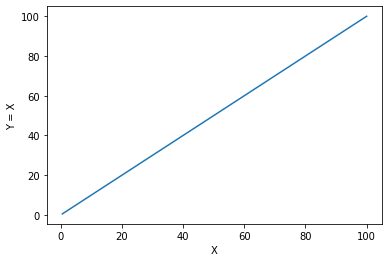

In [311]:
y = x
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = X")

Text(0, 0.5, 'Y = X**2')

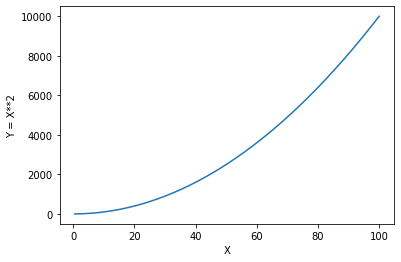

In [312]:
y = x**2
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = X**2")

Text(0, 0.5, 'Y = X**3 / 100')

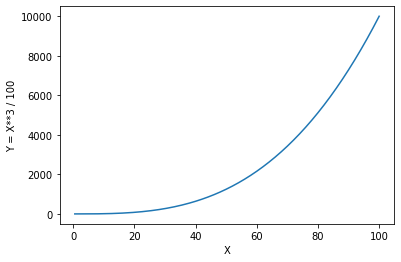

In [313]:
y = (x**3)/100
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = X**3 / 100")

Text(0, 0.5, 'Y = Sin(x)')

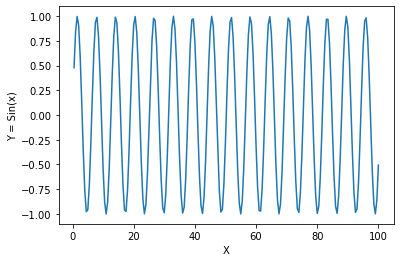

In [314]:
y = np.sin(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = Sin(x)")

Text(0, 0.5, 'Y = Sin(x) / x')

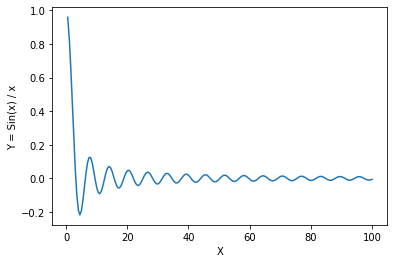

In [315]:
y = np.sin(x)/x
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = Sin(x) / x")

Text(0, 0.5, 'Y = Log(x)')

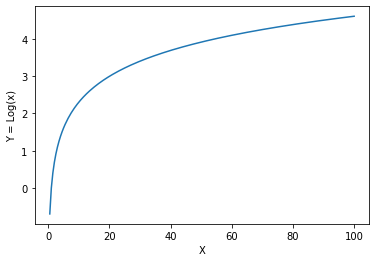

In [316]:
y = np.log(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = Log(x)")

Text(0, 0.5, 'Y = Exp(x)')

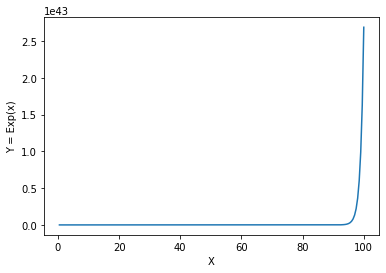

In [317]:
y = np.exp(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y = Exp(x)")

In [318]:
#Ques10)
samples = np.random.uniform(low=1, high=2, size=(20,5))

In [319]:
df = pd.DataFrame(data=samples, columns=['a','b','c','d', 'e'])
df.head()

,a,b,c,d,e
0,1.365342,1.814905,1.044398,1.551268,1.214716
1,1.802930,1.094849,1.305822,1.449233,1.295886
2,1.226641,1.081088,1.624265,1.619506,1.480489
3,1.526291,1.817473,1.342647,1.691307,1.229423
4,1.420083,1.682127,1.847196,1.464260,1.977364


In [320]:
std_cols = []
for col in df.columns:
  std_cols.append(df[col].std())
std_cols = np.array(std_cols)
df.columns[np.where(std_cols==std_cols.max())[0][0]] # column having maximum standard deviation

'b'

In [321]:
mean_rows = []
for row in range(df.shape[0]):
  mean_rows.append(df.iloc[row].mean())
mean_rows = np.array(mean_rows)
np.where(mean_rows==mean_rows.min())[0][0] # row having minimum standard deviation

13

In [322]:
#Ques11)
df['f'] = df.sum(axis='columns')
df.head()

,a,b,c,d,e,f
0,1.365342,1.814905,1.044398,1.551268,1.214716,6.990628
1,1.802930,1.094849,1.305822,1.449233,1.295886,6.948720
2,1.226641,1.081088,1.624265,1.619506,1.480489,7.031989
3,1.526291,1.817473,1.342647,1.691307,1.229423,7.607140
4,1.420083,1.682127,1.847196,1.464260,1.977364,8.391029


In [323]:
def value(f):
  if f < 8:
    return 'LT8'
  else:
    return 'GT8'
df['g'] = df['f'].apply(value)
df.head()

,a,b,c,d,e,f,g
0,1.365342,1.814905,1.044398,1.551268,1.214716,6.990628,LT8
1,1.802930,1.094849,1.305822,1.449233,1.295886,6.948720,LT8
2,1.226641,1.081088,1.624265,1.619506,1.480489,7.031989,LT8
3,1.526291,1.817473,1.342647,1.691307,1.229423,7.607140,LT8
4,1.420083,1.682127,1.847196,1.464260,1.977364,8.391029,GT8


In [324]:
df.loc[df['g']=='LT8']['f'].std() # LT8 rows standard deviation for column f

0.35442422167222565

In [325]:
df.loc[df['g']=='GT8']['f'].std() # GT8 rows standard deviation for column f

0.18018004852776617

Ques12)<br>
Sol)<br>
Broadcasting means transmit the same message to all connected to the ntwork<br> 
In numpy, duplicating and concatenating an array to the same of another array in order to compute element-wise operations. Let's suppose there are two arrays a and b.<br>
Follwoing example shows the broadcasting of vector b on vector a over multiplication.

In [288]:
#Element wise multiplication operation
a = np.array([1, 2, 3])
b = np.array([4, 4, 4])
a * b

array([ 4,  8, 12])

In [289]:
#Multiplication operation using broadcasting
a = np.array([1, 2, 3])
b = np.array([4])
a * b

array([ 4,  8, 12])

In [291]:
#Ques13)
arr = np.random.rand(10)
print(arr)

[0.505526   0.54617607 0.30853667 0.40249968 0.02401642 0.23002638
 0.78809793 0.71142132 0.07584887 0.37490384]


In [292]:
def argmin(arr):
  aux = arr[0]
  ind = 0
  for i, val in enumerate(arr):
    if val < aux:
      aux = val
      ind = i
  return ind
print(argmin(arr))
print(np.argmin(arr))  

4
4
